In [67]:

import numpy as np
import pandas as pd

np.random.seed(42057)
n = 120

depth = np.random.normal(loc=2500, scale=300, size=n).astype(int)
cost = (depth * np.random.normal(loc=120, scale=10, size=n)) + np.random.normal(loc=50000, scale=10000, size=n)
time = (depth / np.random.normal(loc=100, scale=5, size=n)) + np.random.normal(loc=2, scale=1, size=n)
rig_power = np.random.normal(loc=1000, scale=100, size=n)

cost = np.clip(cost, 100000, 500000)
time = np.clip(time, 10, 60)
rig_power = np.clip(rig_power, 800, 1200)

df = pd.DataFrame({
    "Drilling_Depth_m": depth,
    "Drilling_Cost_USD": cost.round(2),
    "Drilling_Time_days": time.round(1),
    "Rig_Power_HP": rig_power.round(1)
})

df.to_csv("drilling_performance_dataset.csv", index=False)
df.head()

,Drilling_Depth_m,Drilling_Cost_USD,Drilling_Time_days,Rig_Power_HP
0,2366,328537.03,25.8,936.6
1,2704,410001.24,27.9,1033.2
2,2688,359736.77,29.8,1091.4
3,2559,362942.01,29.3,974.2
4,2938,381460.17,30.9,1005.1


In [68]:

print(df.isnull().sum())
print(f"Total data points: {len(df)}")

Drilling_Depth_m      0
Drilling_Cost_USD     0
Drilling_Time_days    0
Rig_Power_HP          0
dtype: int64
Total data points: 120


In [69]:

mean_depth = np.mean(df["Drilling_Depth_m"])
std_cost = np.std(df["Drilling_Cost_USD"])
max_time = np.max(df["Drilling_Time_days"])
min_power = np.min(df["Rig_Power_HP"])
median_depth = np.median(df["Drilling_Depth_m"])

print(mean_depth, std_cost, max_time, min_power, median_depth)

2523.3083333333334 46130.211409995565 34.1 807.8 2515.5


In [70]:
# SciPy Correlation
from scipy.stats import pearsonr

corr, p_value = pearsonr(df["Drilling_Depth_m"], df["Drilling_Cost_USD"])
print(f"Correlation: {corr:.2f}, p-value: {p_value:.4f}")

Correlation: 0.80, p-value: 0.0000


In [71]:
# Statsmodels Regression
import statsmodels.api as sm

X = sm.add_constant(df["Drilling_Depth_m"])
y = df["Drilling_Cost_USD"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Drilling_Cost_USD   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     206.7
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.06e-27
Time:                        14:34:22   Log-Likelihood:                -1398.3
No. Observations:                 120   AIC:                             2801.
Df Residuals:                     118   BIC:                             2806.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.797e+04   2.33e+04  

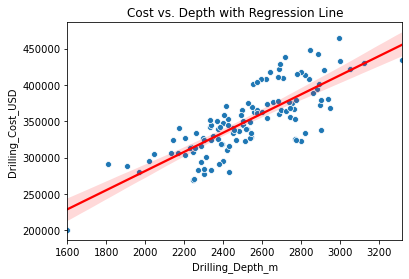

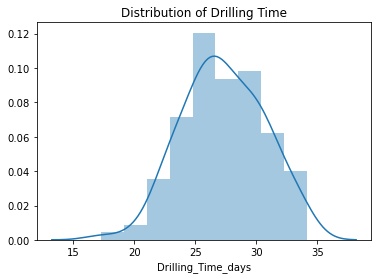

In [76]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="Drilling_Depth_m", y="Drilling_Cost_USD", data=df)
sns.regplot(x="Drilling_Depth_m", y="Drilling_Cost_USD", data=df, scatter=False, color="red")
plt.title("Cost vs. Depth with Regression Line")
plt.show()

# Histogram of Time
sns.distplot(df['Drilling_Time_days'], kde=True)
plt.title("Distribution of Drilling Time")
plt.show()